164402 - Andrey Vinicius Santos Souza


Iter |    x_n-1    |     x_n     |   x_(n+1)   | εa (%)   | Erro real (%)
   0 |  20.0000000 |  25.0000000 |  20.9704439 |  19.2154 |           nan
   1 |  25.0000000 |  20.9704439 |  20.7546807 |   1.0396 |           nan
   2 |  20.9704439 |  20.7546807 |  20.7947659 |   0.1928 |           nan
   3 |  20.7546807 |  20.7947659 |  20.7944161 |   0.0017 |           nan
   4 |  20.7947659 |  20.7944161 |  20.7944154 |   0.0000 |           nan

✅ Convergiu para x ≈ 20.79441542 com erro aproximado de 0.0000%


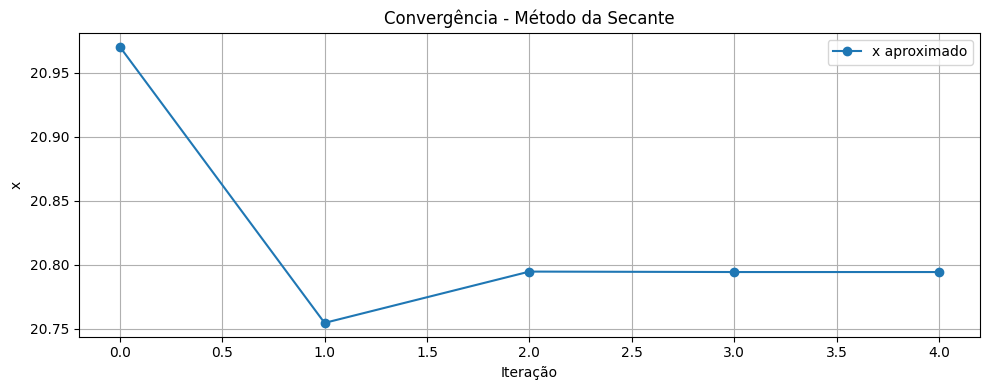

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Função segura a partir de string
def criar_funcao(expr):
    def f(x):
        try:
            return eval(expr, {"x": x, "math": math, "np": np})
        except:
            return float('nan')
    return f

#metodo da secante
def metodo_secante(f_expr, x0, x1, tol_percent, max_iter, raiz_verdadeira=None):
    f = criar_funcao(f_expr)

    iteracoes = []
    valores_x = []
    erros_aprox = []
    erros_reais = []

    print("\nIter |    x_n-1    |     x_n     |   x_(n+1)   | εa (%)   | Erro real (%)")

    for i in range(max_iter):
        f_x0 = f(x0)
        f_x1 = f(x1)

        if f_x1 - f_x0 == 0:
            print("⚠️ Divisão por zero na iteração", i)
            break

        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        erro_aprox = abs((x2 - x1) / x2) * 100 if x2 != 0 else float('inf')
        erro_real = abs((raiz_verdadeira - x2) / raiz_verdadeira) * 100 if raiz_verdadeira else float('nan')

        print(f"{i:4d} | {x0:11.7f} | {x1:11.7f} | {x2:11.7f} | {erro_aprox:8.4f} | {erro_real:13.4f}")

        iteracoes.append(i)
        valores_x.append(x2)
        erros_aprox.append(erro_aprox)
        erros_reais.append(erro_real)

        if erro_aprox < tol_percent:
            print(f"\n✅ Convergiu para x ≈ {x2:.8f} com erro aproximado de {erro_aprox:.4f}%")
            break

        x0, x1 = x1, x2

    # Gráfico da convergência
    plt.figure(figsize=(10, 4))
    plt.plot(iteracoes, valores_x, marker='o', label='x aproximado')
    if raiz_verdadeira:
        plt.axhline(raiz_verdadeira, color='red', linestyle='--', label='x verdadeiro')
    plt.title("Convergência - Método da Secante")
    plt.xlabel("Iteração")
    plt.ylabel("x")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Gráfico do erro real
    if raiz_verdadeira:
        plt.figure(figsize=(10, 4))
        plt.plot(iteracoes, erros_reais, marker='x', color='orange', label='Erro real (%)')
        plt.axhline(tol_percent, color='gray', linestyle='--', label=f'Tolerância {tol_percent}%')
        plt.title("Erro Real Percentual")
        plt.xlabel("Iteração")
        plt.ylabel("Erro Real (%)")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

# === ENTRADA DO USUÁRIO ===
try:
    f_expr = input("Digite a função f(x) (ex: math.exp(-x) - x): ")
    x0 = float(input("Digite o valor inicial x₀: "))
    x1 = float(input("Digite o valor inicial x₁: "))
    tol = float(input("Digite o erro percentual de parada (ex: 1 para 1%): "))
    max_iter = int(input("Digite o número máximo de iterações: "))
    raiz_input = input("Digite a raiz verdadeira (ou pressione Enter se não souber): ")
    raiz_verdadeira = float(raiz_input) if raiz_input else None

    metodo_secante(f_expr, x0, x1, tol, max_iter, raiz_verdadeira)

except Exception as e:
    print(f"\n❌ Erro: {e}")


## B) Resolvendo a temperatura com o método da secante


A temperatura do líquido é dada por:

$$
T(t) = 80e^{-0{,}1t} + 10
$$

Queremos encontrar o tempo \( t \) tal que:

$$
T(t) = 20^\circ C
$$

Ou seja:

$$
80e^{-0{,}1t} + 10 = 20
$$

---

### 🔹 1. Reescrevendo a equação

Isolamos a equação na forma:

$$
f(t) = 80e^{-0{,}1t} - 10 = 0
$$

Nosso objetivo é encontrar a raiz de:

$$
f(t) = 80e^{-0{,}1t} - 10
$$

---

### 🔹 2. Método da Secante – Fórmula

O **método da secante** utiliza dois chutes iniciais \( t_0 \) e \( t_1 \), e a iteração é dada por:

$$
t_{n+1} = t_n - f(t_n) \cdot \frac{t_n - t_{n-1}}{f(t_n) - f(t_{n-1})}
$$

---

### Aplicação

Para encontrar o tempo necessário para atingir 20°C, reescrevemos a função original como:

$$
f(t) = 80e^{-0{,}1t} - 10
$$

O método da secante foi aplicado com diferentes intervalos de teste, observando a **mudança de sinal** entre os valores \( t = 20 \) e \( t = 25 \). Mantivemos esse intervalo como base para o cálculo final.

---

### ✅ Conclusão

**O tempo necessário para atingir 20°C foi de aproximadamente 20,8 minutos.**


## C) em que instante a temperatura é a mais alta.

A função dada é:

$$
T(t) = 80e^{-0{,}1t} + 10
$$

### 🔹 Comportamento da função

Comparando os resultados da **letra A** e da **letra B**, observamos que a função \( T(t) \) é **decrescente**. Isso significa que:

- A temperatura **começa alta** no início do resfriamento.
- Vai **diminuindo com o tempo** à medida que \( t \) aumenta.

---

### 🔹 Temperatura máxima

A temperatura é **máxima** quando:

$$
t = 0
$$

Vamos verificar:

$$
T(0) = 80e^{-0{,}1 \cdot 0} + 10 = 80(1) + 10 = 90^\circ C
$$

---

### ✅ Resposta Final:

- **Instante da temperatura mais alta:** \( t = 0 \) minutos  
- **Temperatura máxima:** $$( 90^\circ C)$$